# Bitacora para el manejo de secuencias fasta y busqueda basica de *Blastn* y *Blastx*


## Para el siguiente ejercicio es necesario tener el Blast+ instalado en la computadora
https://www.ncbi.nlm.nih.gov/guide/data-software/
## y tener instalada las bases de datos 16s microbiano de taxonomica

In [1]:
pwd

'/home/user1/Desktop/jupyter'

In [2]:
cd ../data/fasta/

/home/user1/Desktop/data/fasta


In [4]:
ls

img/  secuencias.fasta


In [9]:
!head secuencias.fasta

In [10]:
# cuantas secuencias hay?
# utilice el comando de linux ">" para saber cuantas secuencias se tienen
!grep ">" secuencias.fasta |wc -l

20


# Blastn

## Revise el manual del Blast y describa qué realizan los siguientes comandos y describalos en las siguientes celdas
https://www.ncbi.nlm.nih.gov/books/NBK279690/

en pdf

https://www.ncbi.nlm.nih.gov/books/NBK279690/pdf/Bookshelf_NBK279690.pdf


In [16]:
%%bash
export BLASTDB=~/Desktop/bigdata/ 
date  
blastn -query secuencias.fasta -db ~/Desktop/bigdata/16SMicrobial \
-out secuencias.tab -evalue 1E-6 -max_target_seqs 1 \
-num_threads 2 -outfmt "6 std sskingdoms stitle staxids sscinames scomnames sblastnames" 
date

Mon Jul 23 21:44:26 UTC 2018
Mon Jul 23 21:44:29 UTC 2018


### Revise el manual del Blast y describa qué valores obtendrá en el archivo de salida
busque '-outfmt'

In [17]:
ls 

img/  secuencias.fasta  secuencias.tab


In [18]:
!head secuencias.tab

Nav1.2_(B9	NR_151897.1	95.469	309	13	1	1	308	1495	1187	5.02e-139	492	Bacteria	Bacillus nakamurai strain NRRL B-41091 16S ribosomal RNA, partial sequence	1793963	Bacillus sp. NRRL B-41091	Bacillus sp. NRRL B-41091	firmicutes
Nav1.2_(D10	NR_115063.1	98.058	309	3	3	1	306	1214	1522	8.16e-152	534	Bacteria	Bacillus halotolerans strain DSM 8802 16S ribosomal RNA, partial sequence	260554	[Brevibacterium] halotolerans	[Brevibacterium] halotolerans	firmicutes
Nav1.8_(B11	NR_025241.1	99.032	310	2	1	1	309	1478	1169	6.33e-158	555	Bacteria	Bacillus aquimaris strain TF-12 16S ribosomal RNA gene, partial sequence	189382	Bacillus aquimaris	Bacillus aquimaris	firmicutes
Nav1.8_(D12	NR_025241.1	99.340	303	2	0	1	303	1205	1507	2.88e-156	549	Bacteria	Bacillus aquimaris strain TF-12 16S ribosomal RNA gene, partial sequence	189382	Bacillus aquimaris	Bacillus aquimaris	firmicutes
Nav2.2_(B10	NR_148756.1	97.840	324	6	1	1	323	1483	1160	5.13e-159	558	Bacteria	Alteromonas mediterranea strain DE 16S ribosomal RNA, 

## se requiere visualizar los datos, para ello se utiliza el manejo de bases de datos que tiene Python

### se cargan la paquetería correspondientes

In [19]:
from pandas import Series, DataFrame
import pandas as pd

###  Blast da los resultados sin nombre de columnas, por lo que se asignan a la variable "encabezado"

In [20]:
encabezado =("qseqid", "sseqid", "pident", "length", "mismatch", "gapopen","qstart", 
             "qend", "sstart","send", "evalue", "bitscore", "sskingdoms", "stitle", 
             "staxids", "sscinames", "scomnames", "sblastnames")

### Se lee el archivo de salida y se asigna a la variable "ftab", con ello se pueden ver los resultados

In [21]:
ftab=pd.read_table("secuencias.tab", header=None , names= encabezado)
ftab

,qseqid,sseqid,pident,length,mismatch,gapopen,qstart,qend,sstart,send,evalue,bitscore,sskingdoms,stitle,staxids,sscinames,scomnames,sblastnames
0,Nav1.2_(B9,NR_151897.1,95.469,309,13,1,1,308,1495,1187,5.020000e-139,492,Bacteria,Bacillus nakamurai strain NRRL B-41091 16S rib...,1793963,Bacillus sp. NRRL B-41091,Bacillus sp. NRRL B-41091,firmicutes
1,Nav1.2_(D10,NR_115063.1,98.058,309,3,3,1,306,1214,1522,8.160000e-152,534,Bacteria,Bacillus halotolerans strain DSM 8802 16S ribo...,260554,[Brevibacterium] halotolerans,[Brevibacterium] halotolerans,firmicutes
2,Nav1.8_(B11,NR_025241.1,99.032,310,2,1,1,309,1478,1169,6.330000e-158,555,Bacteria,Bacillus aquimaris strain TF-12 16S ribosomal ...,189382,Bacillus aquimaris,Bacillus aquimaris,firmicutes
3,Nav1.8_(D12,NR_025241.1,99.340,303,2,0,1,303,1205,1507,2.880000e-156,549,Bacteria,Bacillus aquimaris strain TF-12 16S ribosomal ...,189382,Bacillus aquimaris,Bacillus aquimaris,firmicutes
4,Nav2.2_(B10,NR_148756.1,97.840,324,6,1,1,323,1483,1160,5.130000e-159,558,Bacteria,Alteromonas mediterranea strain DE 16S ribosom...,314275,Alteromonas macleodii str. 'Deep ecotype',Alteromonas macleodii str. 'Deep ecotype',g-proteobacteria
5,Nav2.2_(D11,NR_148756.1,99.668,301,1,0,1,301,1213,1513,8.050000e-157,551,Bacteria,Alteromonas mediterranea strain DE 16S ribosom...,314275,Alteromonas macleodii str. 'Deep ecotype',Alteromonas macleodii str. 'Deep ecotype',g-proteobacteria
6,PET1.2_(A1,NR_148798.1,98.052,308,4,2,1,306,1466,1159,8.160000e-152,534,Bacteria,Pseudomonas populi strain KBL-4-9 16S ribosoma...,1500966,Pseudomonas sp. KBL-4-9,Pseudomonas sp. KBL-4-9,g-proteobacteria
7,PET1.2_(C2,NR_074812.1,97.436,312,8,0,1,312,1204,1515,3.000000e-151,532,Bacteria,Hahella chejuensis strain KCTC 2396 16S riboso...,158327,Hahella chejuensis,Hahella chejuensis,g-proteobacteria
8,PET1.8_(A12,NR_152090.1,100.000,302,0,0,2,303,1477,1176,4.790000e-159,558,Bacteria,Pseudomonas oceani strain DSM 100277 16S ribos...,1708783,Pseudomonas sp. DSM 100277,Pseudomonas sp. DSM 100277,g-proteobacteria
9,PET1.8_(D1,NR_152090.1,99.663,297,1,0,1,297,1199,1495,1.480000e-154,544,Bacteria,Pseudomonas oceani strain DSM 100277 16S ribos...,1708783,Pseudomonas sp. DSM 100277,Pseudomonas sp. DSM 100277,g-proteobacteria


### Describa que es lo que esta observando y qué puede decir de todas las secuencias 

### Podrían eliminarse algunas columnas? Cuál(es)?

# Qué ocurrirá su usa el comando `ftab.head()`?

### Con el fin de resumir la informacion se agruparan considerando el nombre cientifico (sscinames), contando el numero de casos en donde se encontro una asignacion

In [32]:
ftab1= ftab.groupby("sscinames")["qseqid"].count()
ftab1 = DataFrame(ftab1)
ftab1

,qseqid
sscinames,
Alteromonas macleodii str. 'Deep ecotype',10
Bacillus aquimaris,2
Bacillus sp. NRRL B-41091,1
Hahella chejuensis,1
Litoreibacter janthinus,2
Pseudomonas sp. DSM 100277,2
Pseudomonas sp. KBL-4-9,1
[Brevibacterium] halotolerans,1


## para guardar esta informacion se utiliza pandas para guardarlo con formato csv (valores separados por comas)

In [24]:
ftab1.to_csv("secuencias_especies.csv")

In [25]:
ls

secuencias.fasta  secuencias.tab  secuencias_especies.csv


### Que diferencia hay si solamente utiliza estos comandos?

In [63]:
ftab1= ftab.groupby("sscinames")["qseqid"].count()
ftab1

sscinames
Alteromonas macleodii str. 'Deep ecotype'    10
Bacillus aquimaris                            2
Bacillus sp. NRRL B-41091                     1
Hahella chejuensis                            1
Litoreibacter janthinus                       2
Pseudomonas sp. DSM 100277                    2
Pseudomonas sp. KBL-4-9                       1
[Brevibacterium] halotolerans                 1
Name: qseqid, dtype: int64

## cuál considera mas facil de leer?

## Para graficar los resultados se cargan las bibliotecas pylab y matplotlib
Ya vienen integrados con el python y no es necesario descargarlos. Si requiere información adicional:
https://matplotlib.org


In [34]:
import pylab
import matplotlib.pyplot as plt
%matplotlib inline

## que hace al último comando?
`%matplotlib inline`

## para graficar 

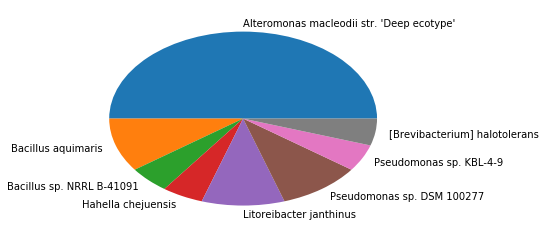

In [35]:
plt.pie(ftab1,
       labels=ftab1.index
       )
plt.show()

### revise el manual del plt.pi y modifique los comandos para que en la grafica se observen todas las leyendas sin traslaparse

In [29]:
?plt.pie

save figure


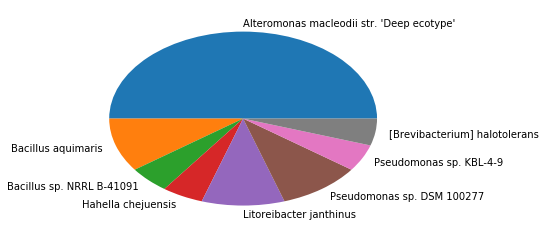

In [36]:
plt.pie(ftab1,
        labels=ftab1.index,
       )
yes = input("save figure")
if yes.lower()=="y":
    plt.savefig('./img/secuencias_pie.png', 
                dpi=800, bbox_inches='tight')

plt.show()



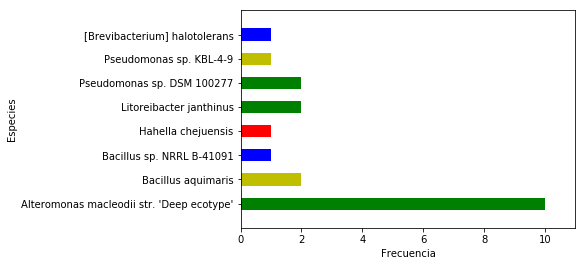

In [37]:
ftab1.plot(kind='barh', color=list('gybr'))
plt.axis([0, max (ftab1)+1, -1, len (ftab1.index)], label=None)
pylab.xlabel("Frecuencia")
pylab.ylabel("Especies")
plt.show()

In [62]:
ftab2 = ftab1.sort_values( ascending=True)
ftab2


TypeError: sort_values() missing 1 required positional argument: 'by'

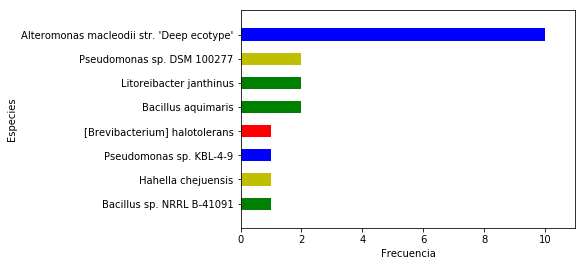

In [39]:
ftab2.plot(kind='barh', color=list('gybr'))
plt.axis([0, max (ftab1)+1, -1, len (ftab1.index)], label=None)
pylab.xlabel("Frecuencia")
pylab.ylabel("Especies")
plt.show()

### Si en vez de utilizar "sscinames" se usa "sblastnames"

In [64]:
ftab1= ftab.groupby("sblastnames")["qseqid"].count()
ftab1

sblastnames
a-proteobacteria     2
firmicutes           4
g-proteobacteria    14
Name: qseqid, dtype: int64

In [72]:
ftab2 = ftab1.sort_values(ascending=False)
ftab2


sblastnames
g-proteobacteria    14
firmicutes           4
a-proteobacteria     2
Name: qseqid, dtype: int64

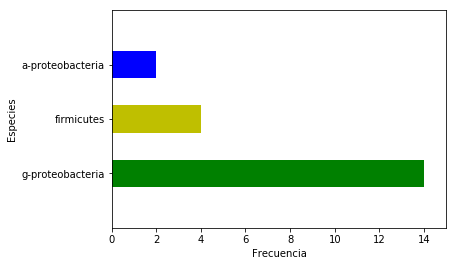

In [73]:
ftab2.plot(kind='barh', color=list('gybr'))
plt.axis([0, max (ftab1)+1, -1, len (ftab1.index)], label=None)
pylab.xlabel("Frecuencia")
pylab.ylabel("Especies")
plt.show()